In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [6]:


# scraping from a static sample job listings page (replace with your target URL)
url = "https://realpython.github.io/fake-jobs/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract job postings
jobs = soup.find_all("div", class_="card-content")

job_list = []
for job in jobs:
    title = job.find("h2", class_="title").text.strip()
    company = job.find("h3", class_="company").text.strip()
    location = job.find("p", class_="location").text.strip()
    date_posted = job.find("time").text.strip()
    job_list.append([title, company, location, date_posted])

# Create DataFrame
df = pd.DataFrame(job_list, columns=["Job Title", "Company", "Location", "Date Posted"])

print("Columns:", df.columns.tolist())
print(df.head())


Columns: ['Job Title', 'Company', 'Location', 'Date Posted']
                 Job Title                     Company              Location  \
0  Senior Python Developer    Payne, Roberts and Davis       Stewartbury, AA   
1          Energy engineer            Vasquez-Davidson  Christopherville, AA   
2          Legal executive  Jackson, Chambers and Levy   Port Ericaburgh, AA   
3   Fitness centre manager              Savage-Bradley     East Seanview, AP   
4          Product manager                 Ramirez Inc   North Jamieview, AP   

  Date Posted  
0  2021-04-08  
1  2021-04-08  
2  2021-04-08  
3  2021-04-08  
4  2021-04-08  


### **Extract Skills**

In [7]:
print(df.shape)   # See how many rows & columns you actually have
print(df.head())  # Preview first few rows


(100, 4)
                 Job Title                     Company              Location  \
0  Senior Python Developer    Payne, Roberts and Davis       Stewartbury, AA   
1          Energy engineer            Vasquez-Davidson  Christopherville, AA   
2          Legal executive  Jackson, Chambers and Levy   Port Ericaburgh, AA   
3   Fitness centre manager              Savage-Bradley     East Seanview, AP   
4          Product manager                 Ramirez Inc   North Jamieview, AP   

  Date Posted  
0  2021-04-08  
1  2021-04-08  
2  2021-04-08  
3  2021-04-08  
4  2021-04-08  


In [8]:
# --- Skill extraction ---
skill_keywords = ["python", "sql", "excel", "machine learning", "aws", "tableau", "r"]

df["Skills"] = df["Job Title"].str.lower().apply(
    lambda x: ", ".join([skill for skill in skill_keywords if skill in x])
)

### **Most common skills**

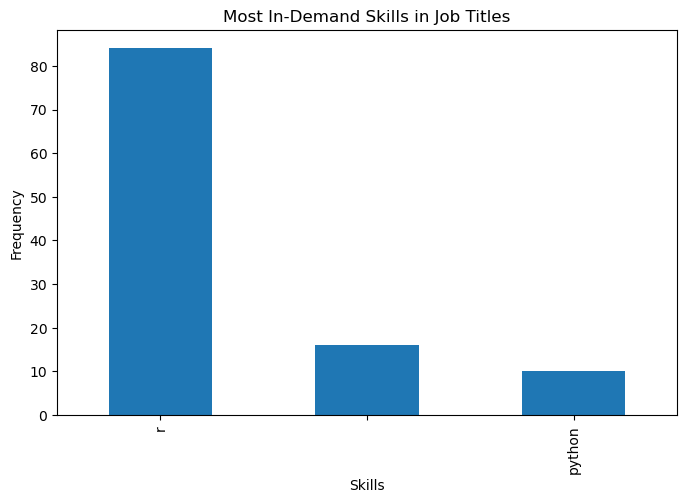

In [9]:
# --- Analysis: Most common skills ---
skill_counts = df["Skills"].str.split(", ").explode().value_counts()

# --- Visualization ---
skill_counts.plot(kind="bar", figsize=(8,5))
plt.title("Most In-Demand Skills in Job Titles")
plt.ylabel("Frequency")
plt.show()

### **Bonus Task**

In [ ]:
# Bonus — Skills by City
skills_by_city = (
    df.assign(Skill=df["Skills"].str.split(", "))
      .explode("Skill")
      .dropna()
      .groupby(["Location", "Skill"])
      .size()
      .reset_index(name="Count")
)

C:\Users\Hp\AppData\Local\Temp\ipykernel_11292\4072400366.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_skills_city = skills_by_city.groupby("Location").apply(



Top skills by city:
              Location Skill  Count
0        Adamburgh, AA     r      1
1       Alberttown, AE            1
2       Amyborough, AA     r      1
3       Angelastad, AP            1
4      Arnoldhaven, AE     r      1
..                 ...   ...    ...
105    Williambury, AA     r      1
106  Williamsburgh, AE            1
107    Wilsonmouth, AA            1
108     Wrightberg, AP     r      1
109    Zacharyport, AA     r      1

[110 rows x 3 columns]


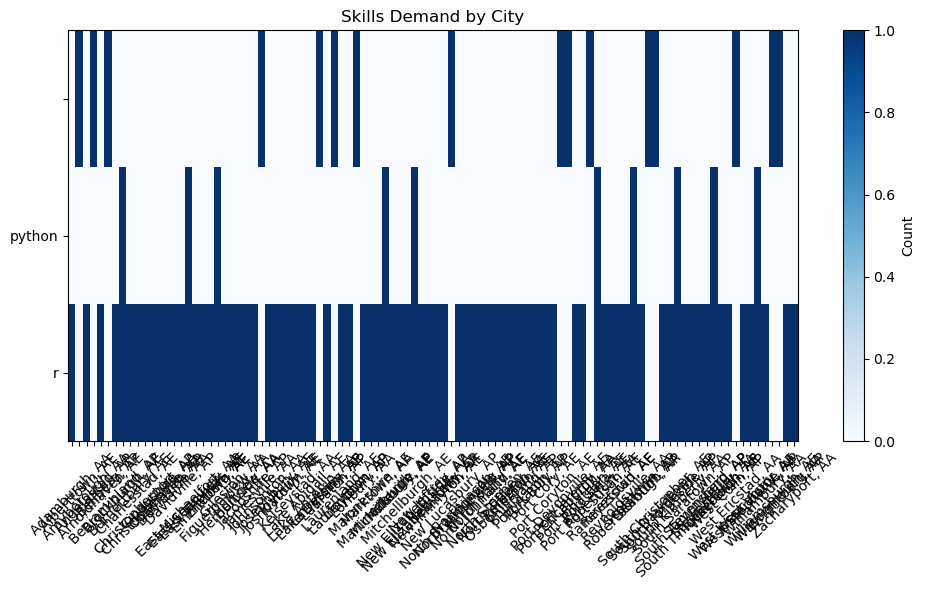

In [11]:
# Top 10 skills per city 
top_skills_city = skills_by_city.groupby("Location").apply(
    lambda x: x.nlargest(3, "Count")
).reset_index(drop=True)

print("\nTop skills by city:")
print(top_skills_city)

# Visualization: Heatmap of Skills by City
pivot_table = skills_by_city.pivot(index="Skill", columns="Location", values="Count").fillna(0)

plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap="Blues", aspect="auto")
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=45)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.colorbar(label="Count")
plt.title("Skills Demand by City")
plt.tight_layout()
plt.show()

In [12]:
skills_by_city = (
    df.assign(Skill=df["Skills"].str.split(", "))
      .explode("Skill")
      .dropna()
      .groupby(["Location", "Skill"])
      .size()
      .reset_index(name="Count")
)

top3_by_city = skills_by_city.groupby("Location").apply(
    lambda x: x.nlargest(3, "Count")
).reset_index(drop=True)

print("\nTop 3 Skills by City:")
print(top3_by_city)


Top 3 Skills by City:
              Location Skill  Count
0        Adamburgh, AA     r      1
1       Alberttown, AE            1
2       Amyborough, AA     r      1
3       Angelastad, AP            1
4      Arnoldhaven, AE     r      1
..                 ...   ...    ...
105    Williambury, AA     r      1
106  Williamsburgh, AE            1
107    Wilsonmouth, AA            1
108     Wrightberg, AP     r      1
109    Zacharyport, AA     r      1

[110 rows x 3 columns]


C:\Users\Hp\AppData\Local\Temp\ipykernel_11292\3635986393.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_by_city = skills_by_city.groupby("Location").apply(


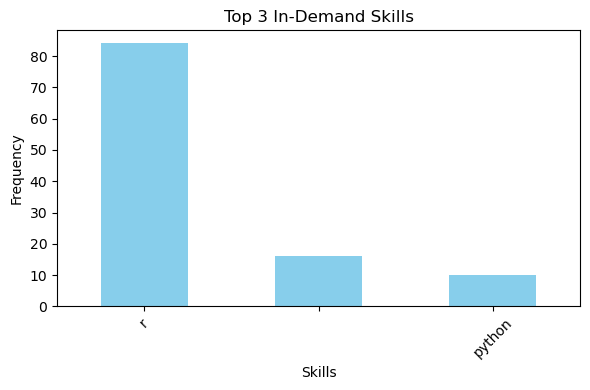

In [13]:
# Plot top 3 skills
plt.figure(figsize=(6, 4))
skill_counts.plot(kind="bar", color="skyblue")
plt.title("Top 3 In-Demand Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()